# Company A - Data Preliminary Analysis

* Dense NN (no temporal dependence)

## Import packages

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import sklearn

In [2]:
from tensorflow.keras.models import (Model, Sequential)
from tensorflow.keras.layers import (Input, Dense, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from tensorflow.keras.optimizers import (Adam, SGD)
from tensorflow.keras.regularizers import l1

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Load data & key parameters

In [4]:
data = pd.read_pickle('mod_data.pkl')
print("Column headings:")
print(data.columns)

Column headings:
Index(['Product Made', 'Air consumption', 'Gas consumption', 'Exhaust gas',
       'Speed', 'Pressure', 'Kiln Feed', 'Dust Addition',
       'Moisture Beltweigher', 'Moisture CLC', 'Additive B', 'Additive C',
       'CLC CaO', 'CLC Na2O', 'Surface Area', 'Compacite', 'd50', 'd90',
       'B₂O₃', 'Na₂O'],
      dtype='object')


In [5]:
# key metrics
col_input = ["Air consumption","Gas consumption","Exhaust gas","Speed","Pressure","Kiln Feed","Dust Addition","Moisture Beltweigher","Moisture CLC","Additive B","Additive C","CLC CaO","CLC Na2O"]
col_output_H = ["Surface Area","Compacite","d50"]
col_output_L = ["d90","B₂O₃","Na₂O"]
prod_type = ['A','B','C','D','F','G','H','I']

## Dense Neural Nets
**Training on three major metrics (Surface Area, Compacite, d50)**

##### Normalize data for NN

In [63]:
from sklearn import preprocessing

# removing Product A (="0") because there are too many, thus dominate results
data_in = data[col_input]
data_outH = data[col_output_H]

# Create a standard processor object
standard_scaler = preprocessing.StandardScaler()
# Create an object to transform the data to fit std processor
x_scaled = standard_scaler.fit_transform(data_in)
x_scaled2 = standard_scaler.fit_transform(data_outH)
# Run the normalizer on the dataframe
data_in_normalized = pd.DataFrame(x_scaled)
data_outH_normalized = pd.DataFrame(x_scaled2)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.1)

##### Inspect data shape 

In [65]:
print(" input layer:",data_in_normalized.shape)
print("output layer:",data_outH_normalized.shape)

 input layer: (1116, 13)
output layer: (1116, 3)


##### Setting up NN

In [105]:
l1_norm = 1e-4

model = Sequential()
model.add(Dense(20, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(5):
    model.add(Dense(20, activation='relu', activity_regularizer=l1(l1_norm)))
model.add(Dense(3, activation='linear'))

##### Compile NN and fit

In [106]:
# set learning rate

lr = 1e-4
model.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history = model.fit(X_train, y_train,
          batch_size=20, epochs=500,
          validation_data=(X_test, y_test))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 3ms/sample - loss: 1.0956 - accuracy: 0.4405 - val_loss: 0.7497 - val_accuracy: 0.4507
Epoch 2/500
781/781 [==============================] - 0s 179us/sample - loss: 1.0899 - accuracy: 0.4417 - val_loss: 0.7437 - val_accuracy: 0.4478
Epoch 3/500
781/781 [==============================] - 0s 246us/sample - loss: 1.0843 - accuracy: 0.4405 - val_loss: 0.7376 - val_accuracy: 0.4388
Epoch 4/500
781/781 [==============================] - 0s 378us/sample - loss: 1.0792 - accuracy: 0.4251 - val_loss: 0.7330 - val_accuracy: 0.4388
Epoch 5/500
781/781 [==============================] - 0s 400us/sample - loss: 1.0742 - accuracy: 0.4315 - val_loss: 0.7265 - val_accuracy: 0.4358
Epoch 6/500
781/781 [==============================] - 0s 486us/sample - loss: 1.0681 - accuracy: 0.4366 - val_loss: 0.7203 - val_accuracy: 0.4448
Epoch 7/500
781/781 [==============================] - 0s 516us/sample - l

781/781 [==============================] - 0s 366us/sample - loss: 0.7927 - accuracy: 0.5224 - val_loss: 0.4445 - val_accuracy: 0.5672
Epoch 57/500
781/781 [==============================] - 0s 332us/sample - loss: 0.7910 - accuracy: 0.5288 - val_loss: 0.4435 - val_accuracy: 0.5701
Epoch 58/500
781/781 [==============================] - 0s 248us/sample - loss: 0.7881 - accuracy: 0.5160 - val_loss: 0.4429 - val_accuracy: 0.5731
Epoch 59/500
781/781 [==============================] - 0s 339us/sample - loss: 0.7868 - accuracy: 0.5352 - val_loss: 0.4420 - val_accuracy: 0.5791
Epoch 60/500
781/781 [==============================] - 0s 329us/sample - loss: 0.7889 - accuracy: 0.5301 - val_loss: 0.4508 - val_accuracy: 0.5612
Epoch 61/500
781/781 [==============================] - 0s 332us/sample - loss: 0.7857 - accuracy: 0.5275 - val_loss: 0.4469 - val_accuracy: 0.5821
Epoch 62/500
781/781 [==============================] - 0s 299us/sample - loss: 0.7833 - accuracy: 0.5352 - val_loss: 0.4443 

781/781 [==============================] - 0s 316us/sample - loss: 0.7317 - accuracy: 0.5685 - val_loss: 0.4360 - val_accuracy: 0.5791
Epoch 112/500
781/781 [==============================] - 0s 351us/sample - loss: 0.7324 - accuracy: 0.5672 - val_loss: 0.4343 - val_accuracy: 0.5821
Epoch 113/500
781/781 [==============================] - 0s 353us/sample - loss: 0.7299 - accuracy: 0.5672 - val_loss: 0.4347 - val_accuracy: 0.5761
Epoch 114/500
781/781 [==============================] - 0s 350us/sample - loss: 0.7287 - accuracy: 0.5621 - val_loss: 0.4360 - val_accuracy: 0.5791
Epoch 115/500
781/781 [==============================] - 0s 331us/sample - loss: 0.7285 - accuracy: 0.5672 - val_loss: 0.4353 - val_accuracy: 0.5791
Epoch 116/500
781/781 [==============================] - 0s 321us/sample - loss: 0.7267 - accuracy: 0.5711 - val_loss: 0.4346 - val_accuracy: 0.5821
Epoch 117/500
781/781 [==============================] - 0s 272us/sample - loss: 0.7265 - accuracy: 0.5647 - val_loss: 0

781/781 [==============================] - 0s 330us/sample - loss: 0.6791 - accuracy: 0.5877 - val_loss: 0.4441 - val_accuracy: 0.5881
Epoch 167/500
781/781 [==============================] - 0s 298us/sample - loss: 0.6780 - accuracy: 0.5903 - val_loss: 0.4426 - val_accuracy: 0.5672
Epoch 168/500
781/781 [==============================] - 0s 309us/sample - loss: 0.6771 - accuracy: 0.5851 - val_loss: 0.4437 - val_accuracy: 0.5701
Epoch 169/500
781/781 [==============================] - 0s 321us/sample - loss: 0.6770 - accuracy: 0.5928 - val_loss: 0.4421 - val_accuracy: 0.5701
Epoch 170/500
781/781 [==============================] - 0s 317us/sample - loss: 0.6757 - accuracy: 0.5864 - val_loss: 0.4433 - val_accuracy: 0.5731
Epoch 171/500
781/781 [==============================] - 0s 323us/sample - loss: 0.6737 - accuracy: 0.5928 - val_loss: 0.4429 - val_accuracy: 0.5791
Epoch 172/500
781/781 [==============================] - 0s 356us/sample - loss: 0.6735 - accuracy: 0.5839 - val_loss: 0

781/781 [==============================] - 0s 376us/sample - loss: 0.6296 - accuracy: 0.6108 - val_loss: 0.4543 - val_accuracy: 0.5851
Epoch 222/500
781/781 [==============================] - 0s 383us/sample - loss: 0.6266 - accuracy: 0.6044 - val_loss: 0.4573 - val_accuracy: 0.5672
Epoch 223/500
781/781 [==============================] - 0s 390us/sample - loss: 0.6271 - accuracy: 0.6133 - val_loss: 0.4550 - val_accuracy: 0.5851
Epoch 224/500
781/781 [==============================] - 0s 357us/sample - loss: 0.6303 - accuracy: 0.6108 - val_loss: 0.4529 - val_accuracy: 0.5672
Epoch 225/500
781/781 [==============================] - 0s 240us/sample - loss: 0.6279 - accuracy: 0.6120 - val_loss: 0.4546 - val_accuracy: 0.5701
Epoch 226/500
781/781 [==============================] - 0s 313us/sample - loss: 0.6238 - accuracy: 0.6056 - val_loss: 0.4566 - val_accuracy: 0.5731
Epoch 227/500
781/781 [==============================] - 0s 226us/sample - loss: 0.6230 - accuracy: 0.6095 - val_loss: 0

781/781 [==============================] - 0s 390us/sample - loss: 0.5775 - accuracy: 0.6184 - val_loss: 0.4753 - val_accuracy: 0.5761
Epoch 277/500
781/781 [==============================] - 0s 427us/sample - loss: 0.5766 - accuracy: 0.6172 - val_loss: 0.4756 - val_accuracy: 0.5791
Epoch 278/500
781/781 [==============================] - 0s 469us/sample - loss: 0.5772 - accuracy: 0.6184 - val_loss: 0.4770 - val_accuracy: 0.5791
Epoch 279/500
781/781 [==============================] - 0s 445us/sample - loss: 0.5749 - accuracy: 0.6210 - val_loss: 0.4774 - val_accuracy: 0.5761
Epoch 280/500
781/781 [==============================] - 0s 453us/sample - loss: 0.5736 - accuracy: 0.6197 - val_loss: 0.4794 - val_accuracy: 0.5731
Epoch 281/500
781/781 [==============================] - 0s 462us/sample - loss: 0.5737 - accuracy: 0.6210 - val_loss: 0.4796 - val_accuracy: 0.5731
Epoch 282/500
781/781 [==============================] - 0s 422us/sample - loss: 0.5718 - accuracy: 0.6236 - val_loss: 0

781/781 [==============================] - 0s 440us/sample - loss: 0.5246 - accuracy: 0.6236 - val_loss: 0.4961 - val_accuracy: 0.5851
Epoch 332/500
781/781 [==============================] - 0s 440us/sample - loss: 0.5277 - accuracy: 0.6031 - val_loss: 0.4994 - val_accuracy: 0.5910
Epoch 333/500
781/781 [==============================] - 0s 415us/sample - loss: 0.5227 - accuracy: 0.6108 - val_loss: 0.4950 - val_accuracy: 0.5701
Epoch 334/500
781/781 [==============================] - 0s 449us/sample - loss: 0.5238 - accuracy: 0.6133 - val_loss: 0.4974 - val_accuracy: 0.5701
Epoch 335/500
781/781 [==============================] - 0s 436us/sample - loss: 0.5214 - accuracy: 0.6133 - val_loss: 0.4971 - val_accuracy: 0.5672
Epoch 336/500
781/781 [==============================] - 0s 432us/sample - loss: 0.5213 - accuracy: 0.6248 - val_loss: 0.4959 - val_accuracy: 0.5761
Epoch 337/500
781/781 [==============================] - 0s 435us/sample - loss: 0.5211 - accuracy: 0.6223 - val_loss: 0

781/781 [==============================] - 0s 434us/sample - loss: 0.4732 - accuracy: 0.6338 - val_loss: 0.5149 - val_accuracy: 0.5701
Epoch 387/500
781/781 [==============================] - 0s 425us/sample - loss: 0.4693 - accuracy: 0.6300 - val_loss: 0.5130 - val_accuracy: 0.5761
Epoch 388/500
781/781 [==============================] - 0s 448us/sample - loss: 0.4702 - accuracy: 0.6325 - val_loss: 0.5153 - val_accuracy: 0.5761
Epoch 389/500
781/781 [==============================] - 0s 444us/sample - loss: 0.4697 - accuracy: 0.6300 - val_loss: 0.5136 - val_accuracy: 0.5821
Epoch 390/500
781/781 [==============================] - 0s 438us/sample - loss: 0.4679 - accuracy: 0.6312 - val_loss: 0.5151 - val_accuracy: 0.5731
Epoch 391/500
781/781 [==============================] - 0s 443us/sample - loss: 0.4667 - accuracy: 0.6274 - val_loss: 0.5153 - val_accuracy: 0.5731
Epoch 392/500
781/781 [==============================] - 0s 425us/sample - loss: 0.4703 - accuracy: 0.6376 - val_loss: 0

781/781 [==============================] - 0s 440us/sample - loss: 0.4106 - accuracy: 0.6197 - val_loss: 0.5268 - val_accuracy: 0.5672
Epoch 442/500
781/781 [==============================] - 0s 420us/sample - loss: 0.4115 - accuracy: 0.6210 - val_loss: 0.5270 - val_accuracy: 0.5701
Epoch 443/500
781/781 [==============================] - 0s 420us/sample - loss: 0.4076 - accuracy: 0.6184 - val_loss: 0.5269 - val_accuracy: 0.5672
Epoch 444/500
781/781 [==============================] - 0s 440us/sample - loss: 0.4096 - accuracy: 0.6300 - val_loss: 0.5297 - val_accuracy: 0.5672
Epoch 445/500
781/781 [==============================] - 0s 418us/sample - loss: 0.4065 - accuracy: 0.6300 - val_loss: 0.5287 - val_accuracy: 0.5672
Epoch 446/500
781/781 [==============================] - 0s 427us/sample - loss: 0.4051 - accuracy: 0.6223 - val_loss: 0.5272 - val_accuracy: 0.5701
Epoch 447/500
781/781 [==============================] - 0s 433us/sample - loss: 0.4037 - accuracy: 0.6197 - val_loss: 0

781/781 [==============================] - 0s 229us/sample - loss: 0.3416 - accuracy: 0.6376 - val_loss: 0.5477 - val_accuracy: 0.5612
Epoch 497/500
781/781 [==============================] - 0s 347us/sample - loss: 0.3394 - accuracy: 0.6338 - val_loss: 0.5480 - val_accuracy: 0.5522
Epoch 498/500
781/781 [==============================] - 0s 435us/sample - loss: 0.3380 - accuracy: 0.6376 - val_loss: 0.5442 - val_accuracy: 0.5522
Epoch 499/500
781/781 [==============================] - 0s 425us/sample - loss: 0.3368 - accuracy: 0.6351 - val_loss: 0.5502 - val_accuracy: 0.5493
Epoch 500/500
781/781 [==============================] - 0s 443us/sample - loss: 0.3371 - accuracy: 0.6389 - val_loss: 0.5447 - val_accuracy: 0.5493


##### Evaluate model

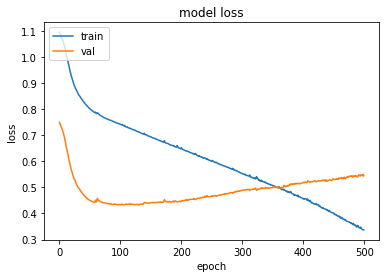

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

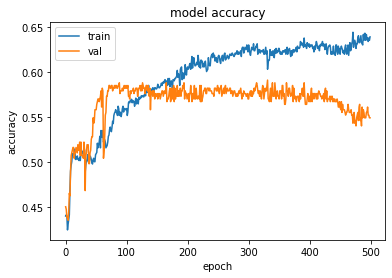

In [108]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
# Prediction
predict_raw = model.predict(X_test, verbose=0)
predict_raw.shape

(369, 3)

### <span style="color:red"> ** Using deeper and wider net </span>

In [87]:
l1_norm = 1e-4

model2 = Sequential()
model2.add(Dense(50, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(10):
    model2.add(Dense(50, activation='relu', activity_regularizer=l1(l1_norm)))
model2.add(Dense(3, activation='linear'))

In [93]:
# set learning rate

lr = 1e-4
model2.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history2 = model2.fit(X_train, y_train,
                      batch_size=100, epochs=500,
                      validation_data=(X_test, y_test))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 3ms/sample - loss: 1.1073 - accuracy: 0.4405 - val_loss: 0.7599 - val_accuracy: 0.4179
Epoch 2/500
781/781 [==============================] - 0s 88us/sample - loss: 1.1063 - accuracy: 0.4302 - val_loss: 0.7591 - val_accuracy: 0.4119
Epoch 3/500
781/781 [==============================] - 0s 78us/sample - loss: 1.1052 - accuracy: 0.4149 - val_loss: 0.7583 - val_accuracy: 0.3910
Epoch 4/500
781/781 [==============================] - 0s 79us/sample - loss: 1.1040 - accuracy: 0.3841 - val_loss: 0.7571 - val_accuracy: 0.3701
Epoch 5/500
781/781 [==============================] - 0s 89us/sample - loss: 1.1023 - accuracy: 0.3892 - val_loss: 0.7554 - val_accuracy: 0.3642
Epoch 6/500
781/781 [==============================] - 0s 94us/sample - loss: 1.1001 - accuracy: 0.3969 - val_loss: 0.7528 - val_accuracy: 0.3881
Epoch 7/500
781/781 [==============================] - 0s 104us/sample - loss: 

781/781 [==============================] - 0s 102us/sample - loss: 0.7099 - accuracy: 0.5365 - val_loss: 0.4573 - val_accuracy: 0.5313
Epoch 57/500
781/781 [==============================] - 0s 96us/sample - loss: 0.7070 - accuracy: 0.5365 - val_loss: 0.4614 - val_accuracy: 0.5433
Epoch 58/500
781/781 [==============================] - 0s 98us/sample - loss: 0.7027 - accuracy: 0.5455 - val_loss: 0.4617 - val_accuracy: 0.5433
Epoch 59/500
781/781 [==============================] - 0s 102us/sample - loss: 0.6994 - accuracy: 0.5506 - val_loss: 0.4630 - val_accuracy: 0.5433
Epoch 60/500
781/781 [==============================] - 0s 98us/sample - loss: 0.6965 - accuracy: 0.5467 - val_loss: 0.4646 - val_accuracy: 0.5493
Epoch 61/500
781/781 [==============================] - 0s 101us/sample - loss: 0.6935 - accuracy: 0.5531 - val_loss: 0.4634 - val_accuracy: 0.5463
Epoch 62/500
781/781 [==============================] - 0s 90us/sample - loss: 0.6914 - accuracy: 0.5595 - val_loss: 0.4649 - va

781/781 [==============================] - 0s 99us/sample - loss: 0.5594 - accuracy: 0.5992 - val_loss: 0.5396 - val_accuracy: 0.5164
Epoch 112/500
781/781 [==============================] - 0s 100us/sample - loss: 0.5571 - accuracy: 0.5928 - val_loss: 0.5369 - val_accuracy: 0.5134
Epoch 113/500
781/781 [==============================] - 0s 93us/sample - loss: 0.5575 - accuracy: 0.6005 - val_loss: 0.5422 - val_accuracy: 0.5194
Epoch 114/500
781/781 [==============================] - 0s 177us/sample - loss: 0.5514 - accuracy: 0.6069 - val_loss: 0.5451 - val_accuracy: 0.5194
Epoch 115/500
781/781 [==============================] - 0s 184us/sample - loss: 0.5520 - accuracy: 0.5980 - val_loss: 0.5521 - val_accuracy: 0.5134
Epoch 116/500
781/781 [==============================] - 0s 185us/sample - loss: 0.5452 - accuracy: 0.6108 - val_loss: 0.5418 - val_accuracy: 0.5164
Epoch 117/500
781/781 [==============================] - 0s 151us/sample - loss: 0.5420 - accuracy: 0.6069 - val_loss: 0.5

781/781 [==============================] - 0s 102us/sample - loss: 0.3742 - accuracy: 0.6172 - val_loss: 0.6603 - val_accuracy: 0.5284
Epoch 167/500
781/781 [==============================] - 0s 105us/sample - loss: 0.3832 - accuracy: 0.6146 - val_loss: 0.6714 - val_accuracy: 0.5761
Epoch 168/500
781/781 [==============================] - 0s 100us/sample - loss: 0.3699 - accuracy: 0.6236 - val_loss: 0.6665 - val_accuracy: 0.5313
Epoch 169/500
781/781 [==============================] - 0s 99us/sample - loss: 0.3661 - accuracy: 0.6184 - val_loss: 0.6916 - val_accuracy: 0.5463
Epoch 170/500
781/781 [==============================] - 0s 99us/sample - loss: 0.3701 - accuracy: 0.6223 - val_loss: 0.6816 - val_accuracy: 0.5701
Epoch 171/500
781/781 [==============================] - 0s 104us/sample - loss: 0.3780 - accuracy: 0.6197 - val_loss: 0.6632 - val_accuracy: 0.5910
Epoch 172/500
781/781 [==============================] - 0s 103us/sample - loss: 0.3730 - accuracy: 0.6287 - val_loss: 0.6

781/781 [==============================] - 0s 175us/sample - loss: 0.1593 - accuracy: 0.6120 - val_loss: 0.7733 - val_accuracy: 0.5821
Epoch 222/500
781/781 [==============================] - 0s 185us/sample - loss: 0.1683 - accuracy: 0.6172 - val_loss: 0.7862 - val_accuracy: 0.5851
Epoch 223/500
781/781 [==============================] - 0s 119us/sample - loss: 0.1655 - accuracy: 0.6159 - val_loss: 0.7828 - val_accuracy: 0.5881
Epoch 224/500
781/781 [==============================] - 0s 99us/sample - loss: 0.1606 - accuracy: 0.6223 - val_loss: 0.7861 - val_accuracy: 0.5672
Epoch 225/500
781/781 [==============================] - 0s 105us/sample - loss: 0.1623 - accuracy: 0.6172 - val_loss: 0.7983 - val_accuracy: 0.5791
Epoch 226/500
781/781 [==============================] - 0s 110us/sample - loss: 0.1518 - accuracy: 0.6223 - val_loss: 0.7950 - val_accuracy: 0.5821
Epoch 227/500
781/781 [==============================] - 0s 95us/sample - loss: 0.1503 - accuracy: 0.6172 - val_loss: 0.7

781/781 [==============================] - 0s 108us/sample - loss: 0.0928 - accuracy: 0.6607 - val_loss: 0.7974 - val_accuracy: 0.5582
Epoch 277/500
781/781 [==============================] - 0s 97us/sample - loss: 0.0912 - accuracy: 0.6645 - val_loss: 0.7925 - val_accuracy: 0.5522
Epoch 278/500
781/781 [==============================] - 0s 109us/sample - loss: 0.0890 - accuracy: 0.6633 - val_loss: 0.7906 - val_accuracy: 0.5552
Epoch 279/500
781/781 [==============================] - 0s 113us/sample - loss: 0.0882 - accuracy: 0.6658 - val_loss: 0.7891 - val_accuracy: 0.5552
Epoch 280/500
781/781 [==============================] - 0s 122us/sample - loss: 0.0881 - accuracy: 0.6620 - val_loss: 0.7856 - val_accuracy: 0.5552
Epoch 281/500
781/781 [==============================] - 0s 133us/sample - loss: 0.0881 - accuracy: 0.6658 - val_loss: 0.7842 - val_accuracy: 0.5552
Epoch 282/500
781/781 [==============================] - 0s 117us/sample - loss: 0.0882 - accuracy: 0.6633 - val_loss: 0.

781/781 [==============================] - 0s 115us/sample - loss: 0.0714 - accuracy: 0.6825 - val_loss: 0.7584 - val_accuracy: 0.5642
Epoch 332/500
781/781 [==============================] - 0s 123us/sample - loss: 0.0740 - accuracy: 0.6940 - val_loss: 0.7574 - val_accuracy: 0.5582
Epoch 333/500
781/781 [==============================] - 0s 112us/sample - loss: 0.0763 - accuracy: 0.6863 - val_loss: 0.7364 - val_accuracy: 0.5552
Epoch 334/500
781/781 [==============================] - 0s 122us/sample - loss: 0.0752 - accuracy: 0.6863 - val_loss: 0.7499 - val_accuracy: 0.5761
Epoch 335/500
781/781 [==============================] - 0s 126us/sample - loss: 0.0785 - accuracy: 0.6876 - val_loss: 0.7460 - val_accuracy: 0.5612
Epoch 336/500
781/781 [==============================] - 0s 114us/sample - loss: 0.0735 - accuracy: 0.6863 - val_loss: 0.7527 - val_accuracy: 0.5672
Epoch 337/500
781/781 [==============================] - 0s 114us/sample - loss: 0.0769 - accuracy: 0.6876 - val_loss: 0

781/781 [==============================] - 0s 104us/sample - loss: 0.0663 - accuracy: 0.7081 - val_loss: 0.7326 - val_accuracy: 0.5881
Epoch 387/500
781/781 [==============================] - 0s 110us/sample - loss: 0.0692 - accuracy: 0.7042 - val_loss: 0.7523 - val_accuracy: 0.5791
Epoch 388/500
781/781 [==============================] - 0s 109us/sample - loss: 0.0705 - accuracy: 0.7081 - val_loss: 0.7425 - val_accuracy: 0.5940
Epoch 389/500
781/781 [==============================] - 0s 106us/sample - loss: 0.0655 - accuracy: 0.7183 - val_loss: 0.7389 - val_accuracy: 0.5940
Epoch 390/500
781/781 [==============================] - 0s 105us/sample - loss: 0.0670 - accuracy: 0.7157 - val_loss: 0.7230 - val_accuracy: 0.5701
Epoch 391/500
781/781 [==============================] - 0s 93us/sample - loss: 0.0672 - accuracy: 0.6991 - val_loss: 0.7399 - val_accuracy: 0.5642
Epoch 392/500
781/781 [==============================] - 0s 89us/sample - loss: 0.0668 - accuracy: 0.7068 - val_loss: 0.7

781/781 [==============================] - 0s 100us/sample - loss: 0.0534 - accuracy: 0.7273 - val_loss: 0.7406 - val_accuracy: 0.5940
Epoch 442/500
781/781 [==============================] - 0s 104us/sample - loss: 0.0537 - accuracy: 0.7324 - val_loss: 0.7264 - val_accuracy: 0.5881
Epoch 443/500
781/781 [==============================] - 0s 98us/sample - loss: 0.0539 - accuracy: 0.7324 - val_loss: 0.7346 - val_accuracy: 0.5851
Epoch 444/500
781/781 [==============================] - 0s 91us/sample - loss: 0.0541 - accuracy: 0.7362 - val_loss: 0.7318 - val_accuracy: 0.5940
Epoch 445/500
781/781 [==============================] - 0s 103us/sample - loss: 0.0545 - accuracy: 0.7247 - val_loss: 0.7307 - val_accuracy: 0.5970
Epoch 446/500
781/781 [==============================] - 0s 101us/sample - loss: 0.0552 - accuracy: 0.7337 - val_loss: 0.7407 - val_accuracy: 0.5910
Epoch 447/500
781/781 [==============================] - 0s 98us/sample - loss: 0.0539 - accuracy: 0.7375 - val_loss: 0.74

781/781 [==============================] - 0s 87us/sample - loss: 0.0472 - accuracy: 0.7439 - val_loss: 0.7194 - val_accuracy: 0.6030
Epoch 497/500
781/781 [==============================] - 0s 98us/sample - loss: 0.0471 - accuracy: 0.7439 - val_loss: 0.7267 - val_accuracy: 0.5970
Epoch 498/500
781/781 [==============================] - 0s 99us/sample - loss: 0.0473 - accuracy: 0.7490 - val_loss: 0.7185 - val_accuracy: 0.5881
Epoch 499/500
781/781 [==============================] - 0s 108us/sample - loss: 0.0475 - accuracy: 0.7439 - val_loss: 0.7358 - val_accuracy: 0.5910
Epoch 500/500
781/781 [==============================] - 0s 101us/sample - loss: 0.0475 - accuracy: 0.7503 - val_loss: 0.7228 - val_accuracy: 0.6000


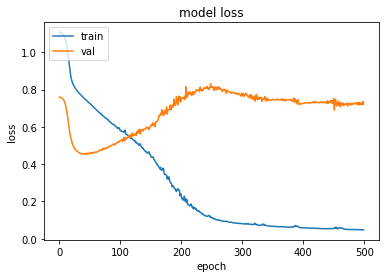

In [94]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

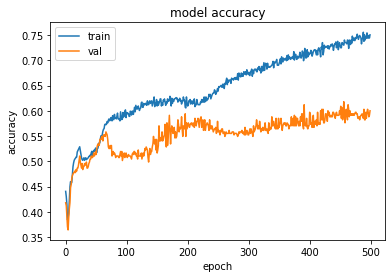

In [95]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### <span style="color:red"> ** Reduce training set </span>

In [99]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(np.array(data_in_normalized), 
                                                    np.array(data_outH_normalized), 
                                                    test_size=0.3)

##### Setting up NN

In [100]:
l1_norm = 1e-4

model3 = Sequential()
model3.add(Dense(50, input_dim=13, activation='relu', activity_regularizer=l1(l1_norm)))
for i in range(10):
    model3.add(Dense(50, activation='relu', activity_regularizer=l1(l1_norm)))
model3.add(Dense(3, activation='linear'))

##### Compile NN and fit

In [101]:
# set learning rate

lr = 1e-4
model3.compile(loss='mean_squared_error', optimizer=Adam(lr), metrics=['accuracy'])
history = model3.fit(X_train3, y_train3,
          batch_size=20, epochs=500,
          validation_data=(X_test3, y_test3))


Train on 781 samples, validate on 335 samples
Epoch 1/500
781/781 [==============================] - 3s 4ms/sample - loss: 0.7647 - accuracy: 0.4264 - val_loss: 1.5585 - val_accuracy: 0.4418
Epoch 2/500
781/781 [==============================] - 0s 258us/sample - loss: 0.7617 - accuracy: 0.4725 - val_loss: 1.5553 - val_accuracy: 0.4657
Epoch 3/500
781/781 [==============================] - 0s 350us/sample - loss: 0.7563 - accuracy: 0.4814 - val_loss: 1.5481 - val_accuracy: 0.4657
Epoch 4/500
781/781 [==============================] - 0s 525us/sample - loss: 0.7407 - accuracy: 0.4981 - val_loss: 1.5287 - val_accuracy: 0.4806
Epoch 5/500
781/781 [==============================] - 0s 517us/sample - loss: 0.7022 - accuracy: 0.5096 - val_loss: 1.4879 - val_accuracy: 0.4955
Epoch 6/500
781/781 [==============================] - 0s 404us/sample - loss: 0.6402 - accuracy: 0.5173 - val_loss: 1.4457 - val_accuracy: 0.4896
Epoch 7/500
781/781 [==============================] - 0s 425us/sample - l

781/781 [==============================] - 0s 337us/sample - loss: 0.2048 - accuracy: 0.5813 - val_loss: 1.5477 - val_accuracy: 0.4866
Epoch 57/500
781/781 [==============================] - 0s 321us/sample - loss: 0.1845 - accuracy: 0.5864 - val_loss: 1.5469 - val_accuracy: 0.4955
Epoch 58/500
781/781 [==============================] - 0s 311us/sample - loss: 0.1812 - accuracy: 0.5762 - val_loss: 1.5711 - val_accuracy: 0.5045
Epoch 59/500
781/781 [==============================] - 0s 318us/sample - loss: 0.1740 - accuracy: 0.5864 - val_loss: 1.5666 - val_accuracy: 0.4925
Epoch 60/500
781/781 [==============================] - 0s 333us/sample - loss: 0.1783 - accuracy: 0.5928 - val_loss: 1.5706 - val_accuracy: 0.5045
Epoch 61/500
781/781 [==============================] - 0s 325us/sample - loss: 0.1785 - accuracy: 0.5877 - val_loss: 1.5709 - val_accuracy: 0.5075
Epoch 62/500
781/781 [==============================] - 0s 333us/sample - loss: 0.1759 - accuracy: 0.5877 - val_loss: 1.5694 

781/781 [==============================] - 0s 440us/sample - loss: 0.1166 - accuracy: 0.6645 - val_loss: 1.6402 - val_accuracy: 0.5104
Epoch 112/500
781/781 [==============================] - 0s 345us/sample - loss: 0.1174 - accuracy: 0.6556 - val_loss: 1.6455 - val_accuracy: 0.4985
Epoch 113/500
781/781 [==============================] - 0s 516us/sample - loss: 0.1481 - accuracy: 0.6530 - val_loss: 1.6410 - val_accuracy: 0.4925
Epoch 114/500
781/781 [==============================] - 0s 495us/sample - loss: 0.1213 - accuracy: 0.6530 - val_loss: 1.6145 - val_accuracy: 0.5194
Epoch 115/500
781/781 [==============================] - 0s 314us/sample - loss: 0.1169 - accuracy: 0.6504 - val_loss: 1.6283 - val_accuracy: 0.5015
Epoch 116/500
781/781 [==============================] - 0s 293us/sample - loss: 0.1171 - accuracy: 0.6594 - val_loss: 1.6337 - val_accuracy: 0.5104
Epoch 117/500
781/781 [==============================] - 0s 304us/sample - loss: 0.1116 - accuracy: 0.6530 - val_loss: 1

781/781 [==============================] - 0s 366us/sample - loss: 0.0814 - accuracy: 0.7119 - val_loss: 1.6420 - val_accuracy: 0.5313
Epoch 167/500
781/781 [==============================] - 0s 403us/sample - loss: 0.0693 - accuracy: 0.7119 - val_loss: 1.6474 - val_accuracy: 0.5552
Epoch 168/500
781/781 [==============================] - 0s 319us/sample - loss: 0.0680 - accuracy: 0.7081 - val_loss: 1.6753 - val_accuracy: 0.5254
Epoch 169/500
781/781 [==============================] - 0s 392us/sample - loss: 0.0742 - accuracy: 0.7055 - val_loss: 1.6668 - val_accuracy: 0.5373
Epoch 170/500
781/781 [==============================] - 0s 399us/sample - loss: 0.0791 - accuracy: 0.7119 - val_loss: 1.6450 - val_accuracy: 0.5463
Epoch 171/500
781/781 [==============================] - 0s 352us/sample - loss: 0.0689 - accuracy: 0.7081 - val_loss: 1.6637 - val_accuracy: 0.5343
Epoch 172/500
781/781 [==============================] - 0s 399us/sample - loss: 0.0695 - accuracy: 0.6978 - val_loss: 1

781/781 [==============================] - 0s 470us/sample - loss: 0.0459 - accuracy: 0.7401 - val_loss: 1.6522 - val_accuracy: 0.5254
Epoch 222/500
781/781 [==============================] - 0s 453us/sample - loss: 0.0452 - accuracy: 0.7439 - val_loss: 1.6638 - val_accuracy: 0.5254
Epoch 223/500
781/781 [==============================] - 0s 440us/sample - loss: 0.0442 - accuracy: 0.7388 - val_loss: 1.6593 - val_accuracy: 0.5313
Epoch 224/500
781/781 [==============================] - 0s 586us/sample - loss: 0.0434 - accuracy: 0.7503 - val_loss: 1.6572 - val_accuracy: 0.5254
Epoch 225/500
781/781 [==============================] - 0s 507us/sample - loss: 0.0434 - accuracy: 0.7554 - val_loss: 1.6647 - val_accuracy: 0.5284
Epoch 226/500
781/781 [==============================] - 0s 622us/sample - loss: 0.0443 - accuracy: 0.7567 - val_loss: 1.6588 - val_accuracy: 0.5403
Epoch 227/500
781/781 [==============================] - 0s 537us/sample - loss: 0.0442 - accuracy: 0.7529 - val_loss: 1

781/781 [==============================] - 0s 449us/sample - loss: 0.0473 - accuracy: 0.7324 - val_loss: 1.6849 - val_accuracy: 0.5075
Epoch 277/500
781/781 [==============================] - 0s 406us/sample - loss: 0.0453 - accuracy: 0.7695 - val_loss: 1.6873 - val_accuracy: 0.5015
Epoch 278/500
781/781 [==============================] - 0s 410us/sample - loss: 0.0452 - accuracy: 0.7695 - val_loss: 1.6799 - val_accuracy: 0.5015
Epoch 279/500
781/781 [==============================] - 0s 388us/sample - loss: 0.0470 - accuracy: 0.7785 - val_loss: 1.6953 - val_accuracy: 0.4925
Epoch 280/500
781/781 [==============================] - 0s 380us/sample - loss: 0.0428 - accuracy: 0.7670 - val_loss: 1.6743 - val_accuracy: 0.5045
Epoch 281/500
781/781 [==============================] - 0s 564us/sample - loss: 0.0617 - accuracy: 0.7798 - val_loss: 1.6756 - val_accuracy: 0.5104
Epoch 282/500
781/781 [==============================] - 0s 591us/sample - loss: 0.0427 - accuracy: 0.7670 - val_loss: 1

781/781 [==============================] - 0s 564us/sample - loss: 0.0303 - accuracy: 0.8131 - val_loss: 1.6812 - val_accuracy: 0.5075
Epoch 332/500
781/781 [==============================] - 0s 577us/sample - loss: 0.0369 - accuracy: 0.7926 - val_loss: 1.6715 - val_accuracy: 0.5104
Epoch 333/500
781/781 [==============================] - 0s 600us/sample - loss: 0.0484 - accuracy: 0.8079 - val_loss: 1.6590 - val_accuracy: 0.5194
Epoch 334/500
781/781 [==============================] - 0s 456us/sample - loss: 0.0317 - accuracy: 0.8054 - val_loss: 1.6783 - val_accuracy: 0.5104
Epoch 335/500
781/781 [==============================] - 0s 417us/sample - loss: 0.0307 - accuracy: 0.8028 - val_loss: 1.6846 - val_accuracy: 0.5075
Epoch 336/500
781/781 [==============================] - 0s 389us/sample - loss: 0.0297 - accuracy: 0.8118 - val_loss: 1.6745 - val_accuracy: 0.5194
Epoch 337/500
781/781 [==============================] - 0s 320us/sample - loss: 0.0298 - accuracy: 0.8118 - val_loss: 1

781/781 [==============================] - 0s 495us/sample - loss: 0.0303 - accuracy: 0.8374 - val_loss: 1.6567 - val_accuracy: 0.5313
Epoch 387/500
781/781 [==============================] - 0s 331us/sample - loss: 0.0300 - accuracy: 0.8412 - val_loss: 1.6604 - val_accuracy: 0.5164
Epoch 388/500
781/781 [==============================] - 0s 505us/sample - loss: 0.0299 - accuracy: 0.8489 - val_loss: 1.6584 - val_accuracy: 0.5224
Epoch 389/500
781/781 [==============================] - 0s 512us/sample - loss: 0.0298 - accuracy: 0.8412 - val_loss: 1.6560 - val_accuracy: 0.5224
Epoch 390/500
781/781 [==============================] - 0s 495us/sample - loss: 0.0295 - accuracy: 0.8399 - val_loss: 1.6626 - val_accuracy: 0.5254
Epoch 391/500
781/781 [==============================] - 0s 518us/sample - loss: 0.0295 - accuracy: 0.8489 - val_loss: 1.6580 - val_accuracy: 0.5194
Epoch 392/500
781/781 [==============================] - 0s 487us/sample - loss: 0.0294 - accuracy: 0.8489 - val_loss: 1

781/781 [==============================] - 0s 573us/sample - loss: 0.0247 - accuracy: 0.8643 - val_loss: 1.6794 - val_accuracy: 0.4955
Epoch 442/500
781/781 [==============================] - 0s 564us/sample - loss: 0.0245 - accuracy: 0.8707 - val_loss: 1.6821 - val_accuracy: 0.4925
Epoch 443/500
781/781 [==============================] - 0s 603us/sample - loss: 0.0242 - accuracy: 0.8630 - val_loss: 1.6762 - val_accuracy: 0.4985
Epoch 444/500
781/781 [==============================] - 0s 555us/sample - loss: 0.0240 - accuracy: 0.8604 - val_loss: 1.6809 - val_accuracy: 0.4985
Epoch 445/500
781/781 [==============================] - 0s 321us/sample - loss: 0.0254 - accuracy: 0.8528 - val_loss: 1.6803 - val_accuracy: 0.4955
Epoch 446/500
781/781 [==============================] - 0s 509us/sample - loss: 0.0243 - accuracy: 0.8566 - val_loss: 1.6743 - val_accuracy: 0.4985
Epoch 447/500
781/781 [==============================] - 0s 345us/sample - loss: 0.0249 - accuracy: 0.8553 - val_loss: 1

781/781 [==============================] - 0s 358us/sample - loss: 0.0261 - accuracy: 0.8592 - val_loss: 1.6593 - val_accuracy: 0.4955
Epoch 497/500
781/781 [==============================] - 0s 348us/sample - loss: 0.0230 - accuracy: 0.8528 - val_loss: 1.6707 - val_accuracy: 0.4896
Epoch 498/500
781/781 [==============================] - 0s 557us/sample - loss: 0.0242 - accuracy: 0.8694 - val_loss: 1.6799 - val_accuracy: 0.4836
Epoch 499/500
781/781 [==============================] - 0s 451us/sample - loss: 0.0231 - accuracy: 0.8643 - val_loss: 1.6803 - val_accuracy: 0.4746
Epoch 500/500
781/781 [==============================] - 0s 306us/sample - loss: 0.0235 - accuracy: 0.8630 - val_loss: 1.6901 - val_accuracy: 0.4746


##### Evaluate model

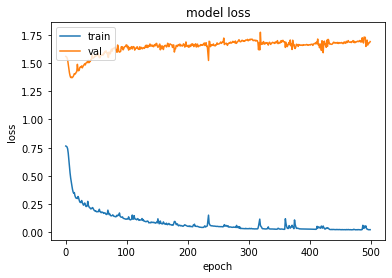

In [102]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

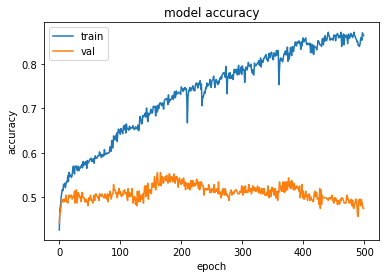

In [103]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()